## Лаб.12 LDA

### Анализ документов методом тематического моделирования

---

#### Входные данные: 
датасет в формате `Vowpal Wabbit`, сохраненный в файл `txt`, содержащий короткие тексты новостей из области науки, с указанием ссылки в Интернете и автора. Новости лемматизированы и приведены в один регистр.

#### Задание:
Исследовать новости на предмет тематического сходства и общих интересов авторов статей методом тематического моделирования `LDA`.

Необходимо определить:
1. Какие темы наиболее выражены в документах? (топ-10 тем)
2. Какие авторы значимы в этих темах? (список авторов)
3. Какие группы образуют авторы по темам? (группы авторов)

Справочник: https://radimrehurek.com/gensim/models/ldamodel.html


**Порядок выполнения работы:**
1. Прочитайте исходные данные в датафрейм. Разделитель – символ ‘|’, заголовков нет. При желании – создайте заголовки столбцов.
2. Выведите несколько первых строк датафрейма (для контроля корректности импорта). Удалите из второго столбца символы ‘text ‘, из третьего – символы ‘author ‘.<br>Например, так:<br>`df[2] = [str(df[2].values[i]).strip('author ') for i in range(df.shape[0])]`<br>Для удобства дальнейшей работы выделите в отдельные объекты `Series` тексты новостей и авторов.<br>Для обучения модели `LDA` требуются словарь и корпус, построенные на текстах документов.
3. Получите двумерный массив слов с примерным выводом в таком виде для документа с номером 0:<br>`>>print(words[0])`<br>`['клетка', 'каков', 'функция', 'клетка', 'какой', 'значение', 'изучение', 'функция', 'эндотелий', 'мочь', 'иметь', 'для', 'спортивный', 'медицина', 'как', 'возможный', 'тренировка', 'клетка', 'это', 'рассказывать', 'доктор', 'медицинский', 'наука', 'александр', 'парфенов']`<br>Можно воспользоваться векторайзерами `sklearn CountVectorizer` или `Gensim simple_preprocess` (но не обязательно, можно обойтись и без вектора).
4. Подключите модули `corpora`, `models` библиотеки `Gensim`. Постройте словарь:<br>`dictionary = corpora.Dictionary(words)`
5. Постройте корпус при помощи команды:<br>`corpus = [dictionary.doc2bow(text) for text in words]`
6. Зафиксируйте `random.seed` и обучите модель `LDA` на полученном корпусе с параматрами: 29 тем, количество проходов по коллекции 5, `id2word=dictionary`. Сохраните модель в отдельный файл: `ldamodel.save(“путь к файлу”)`<br>Далее вы можете вызвать модель командой `ldamodel.load(“путь к файлу”)`. Это позволяет сэкономить время на обучении модели, которое может быть немалым.
7. Вызовите метод модели `show_topics()`, указав количество тем 10 и количество токенов 15. Выведите темы на печать.
8. Выведите 10 самых значимых тем, оцененных по когерентности.<br><u>Рекомендация</u>: воспользуйтесь методом `top_topics()` класса `LdaModel`.
9. Выведите темы, выраженные в каждом документе, с их вероятностями. <br><u>Рекомендация</u>: `get_document_topics`
10. Выведите список документов вместе с их самой вероятной темой и автором.
11. Выведите список авторов с темами их статей. Отберите 10 авторов с наибольшим количеством тем.
12. Постройте матрицу сходства авторов по набору тем их статей.
13. Постройте гистограмму распределения тем в документах.
14. Постройте пузырьковую диаграмму, отображающую темы в пространстве слов.<br><u>Рекомендация</u>: инструмент `pyLDAvis`.


**Полезные функции `LDAModel`:**
* `print_topics(num_topics=10, num_words=10)`<br># получить наиболее важные темы (полный аналог `show_topics ()`)
* `show_topic(topicid)`<br># представление по одной теме. Слова здесь представляют собой фактические строки.
* `get_document_topics(list(corpus)[0])`<br># Распределение тем для данного документа. Если параметр `per_word_topics=True`: наиболее вероятные темы на слово.
* `get_term_topics (word_id)`<br># самые актуальные темы для данного слова.
* `get_topic_terms(topicid)`<br># слова по одной теме, возвр. `list (word_id, probab),`
* `get_topics()`<br># возвр. `list{str, tuple of (str, float)}`
* `top_topics()`<br># Каждый элемент в списке представляет собой пару из представления темы и ее оценки согласованности.<br>Представления тем — это распределения слов, представленные в виде списка пар идентификаторов слов и их вероятностей.

---

1. Прочитайте исходные данные в датафрейм. Разделитель – символ ‘|’, заголовков нет. При желании – создайте заголовки столбцов.

In [ ]:
!pip install pyldavis

In [2]:
import gensim
import pandas as pd
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [4]:
# read the original data "lectures.txt" into a dataframe
# the separator is the symbol ‘|’, there are no headers

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/lectures.txt', sep='|', header=None)
df.columns = ['url', 'text', 'author']
df.head()

,url,text,author
0,http://postnauka.ru/video/10006,text клетка каков функция клетка какой значени...,author Александр_Парфенов
1,http://postnauka.ru/video/10379,text чем особенность какой свойство мочь облад...,author Владимир_Шалаев
2,http://postnauka.ru/video/10380,text ресурсный проклятие что связанный феномен...,author Сергей_Гуриев
3,http://postnauka.ru/video/10381,text мировой средневековье отличаться средневе...,author Павел_Уваров
4,http://postnauka.ru/video/10382,text ген устойчивость алкоголь как ген влиять ...,author Светлана_Боринская


---

2. Выведите несколько первых строк датафрейма (для контроля корректности импорта). Удалите из второго столбца символы ‘text ‘, из третьего – символы ‘author ‘.<br>Например, так:<br>`df[2] = [str(df[2].values[i]).strip('author ') for i in range(df.shape[0])]`<br>Для удобства дальнейшей работы выделите в отдельные объекты `Series` тексты новостей и авторов.<br>Для обучения модели `LDA` требуются словарь и корпус, построенные на текстах документов.

In [5]:
# output the first few lines of the dataframe (to control the correctness of the import)
# delete the 'text' characters from the second column and 'author' characters from the third

df['text'] = [str(df['text'].values[i]).strip('text ') for i in range(df.shape[0])]
df['author'] = [str(df['author'].values[i]).strip('author ') for i in range(df.shape[0])]
df.head()

,url,text,author
0,http://postnauka.ru/video/10006,клетка каков функция клетка какой значение изу...,Александр_Парфенов
1,http://postnauka.ru/video/10379,чем особенность какой свойство мочь обладать р...,Владимир_Шалаев
2,http://postnauka.ru/video/10380,ресурсный проклятие что связанный феномен ресу...,Сергей_Гуриев
3,http://postnauka.ru/video/10381,мировой средневековье отличаться средневековье...,Павел_Уваров
4,http://postnauka.ru/video/10382,ген устойчивость алкоголь как ген влиять потре...,Светлана_Боринская


---

3. Получите двумерный массив слов с примерным выводом в таком виде для документа с номером 0:<br>`>>print(words[0])`<br>`['клетка', 'каков', 'функция', 'клетка', 'какой', 'значение', 'изучение', 'функция', 'эндотелий', 'мочь', 'иметь', 'для', 'спортивный', 'медицина', 'как', 'возможный', 'тренировка', 'клетка', 'это', 'рассказывать', 'доктор', 'медицинский', 'наука', 'александр', 'парфенов']`<br>Можно воспользоваться векторайзерами `sklearn CountVectorizer` или `Gensim simple_preprocess` (но не обязательно, можно обойтись и без вектора).

In [6]:
# without excluding stop words

texts=df['text']
words=[]
for text in texts:
  word=text.split(' ')
  words.append(word)
print(words[0])
print(len(words[0]))

['клетка', 'каков', 'функция', 'клетка', 'какой', 'значение', 'изучение', 'функция', 'эндотелий', 'мочь', 'иметь', 'для', 'спортивный', 'медицина', 'как', 'возможный', 'тренировка', 'клетка', 'это', 'рассказывать', 'доктор', 'медицинский', 'наука', 'александр', 'парфенов']
25


In [7]:
import nltk
nltk.download('stopwords')
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
words=[]
stop_words = set(stopwords.words('russian'))
for text in texts:
  tokens=[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in stop_words and len(token) > 3:
      tokens.append(token)
  words.append(tokens)
print(words[0])
print(len(words[0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['клетка', 'каков', 'функция', 'клетка', 'значение', 'изучение', 'функция', 'эндотелий', 'мочь', 'иметь', 'спортивный', 'медицина', 'возможный', 'тренировка', 'клетка', 'рассказывать', 'доктор', 'медицинский', 'наука', 'александр', 'парфенов']
21


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vects = vectorizer.fit_transform(texts)
print(vects[0])

  (0, 8447)	3
  (0, 7919)	1
  (0, 24516)	2
  (0, 7922)	1
  (0, 6911)	1
  (0, 7243)	1
  (0, 25872)	1
  (0, 11332)	1
  (0, 7295)	1
  (0, 5313)	1
  (0, 21700)	1
  (0, 10556)	1
  (0, 7916)	1
  (0, 2884)	1
  (0, 23103)	1
  (0, 26033)	1
  (0, 19158)	1
  (0, 5426)	1
  (0, 10557)	1
  (0, 11946)	1
  (0, 349)	1
  (0, 14956)	1


---

4. Подключите модули `corpora`, `models` библиотеки `Gensim`. Постройте словарь:<br>`dictionary = corpora.Dictionary(words)`

In [9]:
# connect the corpora, models modules of the Gensim library. build a dictionary: dictionary = corpora.Dictionary(words)

from gensim import corpora
dictionary = corpora.Dictionary(words)
print(dictionary[0])

александр


---

5. Постройте корпус при помощи команды:<br>`corpus = [dictionary.doc2bow(text) for text in words]`

In [10]:
# build the corpus using the command: corpus = [dictionary.doc2bow(text) for text in words]

corpus = [dictionary.doc2bow(text) for text in words]
print(len(corpus))
print(corpus[0])
print(dictionary[8])

1728
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1)]
медицина


---

6. Зафиксируйте `random.seed` и обучите модель `LDA` на полученном корпусе с параматрами: 29 тем, количество проходов по коллекции 5, `id2word=dictionary`. Сохраните модель в отдельный файл: `ldamodel.save(“путь к файлу”)`<br>Далее вы можете вызвать модель командой `ldamodel.load(“путь к файлу”)`. Это позволяет сэкономить время на обучении модели, которое может быть немалым.

In [11]:
# fix random.seed and train the LDA model on the resulting corpus with parameters: 29 topics, 
# number of passes through the collection 5, id2word=dictionary. Save the model to a separate 
# file: ldamodel.save("path to the file"). next, you can call the model with the ldamodel.load
# (path) command. this allows you to save time on training the model, which can be considerable

import random

random.seed(42)
%time ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=29, id2word=dictionary, passes=5)
ldamodel.save("ldamodel")

CPU times: user 36.5 s, sys: 26 s, total: 1min 2s
Wall time: 37.3 s


---

7. Вызовите метод модели `show_topics()`, указав количество тем 10 и количество токенов 15. Выведите темы на печать.

In [12]:
# call the model's show_topics() method, specifying the number of topics 10 and the number of tokens 15. print the topics

popular_topics = ldamodel.print_topics(10, 15) # LdaModel.print_topics(num_topics=10, num_words=10)

for idx, topic in popular_topics: 
    print('Topic: {:^4} Word: {:^4}'.format(idx, topic))

Topic:  0   Word: 0.015*"который" + 0.011*"время" + 0.010*"материал" + 0.007*"очень" + 0.006*"человек" + 0.006*"мочь" + 0.005*"самый" + 0.004*"частота" + 0.004*"точность" + 0.004*"атом" + 0.004*"говорить" + 0.004*"первый" + 0.004*"являться" + 0.004*"весь" + 0.004*"тело"
Topic:  5   Word: 0.019*"который" + 0.010*"мочь" + 0.008*"человек" + 0.008*"язык" + 0.007*"память" + 0.007*"говорить" + 0.006*"весь" + 0.005*"очень" + 0.005*"свой" + 0.005*"социальный" + 0.005*"объект" + 0.005*"внимание" + 0.005*"например" + 0.005*"время" + 0.004*"некоторый"
Topic:  3   Word: 0.017*"который" + 0.012*"очень" + 0.010*"мочь" + 0.010*"самый" + 0.009*"раса" + 0.008*"весь" + 0.005*"большой" + 0.005*"человек" + 0.005*"например" + 0.004*"время" + 0.004*"говорить" + 0.004*"образ" + 0.003*"некоторый" + 0.003*"дело" + 0.003*"называть"
Topic:  14  Word: 0.014*"который" + 0.009*"галактика" + 0.007*"мочь" + 0.007*"организм" + 0.006*"весь" + 0.006*"тело" + 0.006*"человек" + 0.005*"древний" + 0.004*"след" + 0.004*"живо

---

8. Выведите 10 самых значимых тем, оцененных по когерентности.<br><u>Рекомендация</u>: воспользуйтесь методом `top_topics()` класса `LdaModel`.

In [13]:
# list the top 10 topics, ranked by coherence. Recommendation: use the top_topics() method of the LdaModel class

toptopic=ldamodel.top_topics(corpus=corpus, texts=texts, dictionary=dictionary, window_size=None, coherence='u_mass', topn=10, processes=-1)
print(toptopic)
print(len(toptopic))

[([(0.066435136, 'язык'), (0.021003133, 'который'), (0.01620178, 'слово'), (0.00898417, 'говорить'), (0.008803557, 'русский'), (0.0069274846, 'например'), (0.005798274, 'человек'), (0.0056919414, 'мочь'), (0.0053740777, 'очень'), (0.0053276448, 'разный')], -0.48538262046533864), ([(0.02262622, 'который'), (0.009271926, 'человек'), (0.008075176, 'свой'), (0.0068420703, 'мочь'), (0.0066544698, 'очень'), (0.0060551735, 'весь'), (0.005087928, 'наука'), (0.0048430418, 'система'), (0.0046859616, 'политический'), (0.0044701076, 'становиться')], -0.7040315154358389), ([(0.021310834, 'который'), (0.017842976, 'человек'), (0.013004035, 'мочь'), (0.007912977, 'очень'), (0.006193725, 'право'), (0.0058713886, 'свой'), (0.0054083825, 'говорить'), (0.0050118146, 'самый'), (0.0048113232, 'решение'), (0.004785596, 'весь')], -0.7289410849652636), ([(0.020349216, 'который'), (0.008315753, 'человек'), (0.008044427, 'очень'), (0.0064433077, 'наука'), (0.005706873, 'советский'), (0.0054843095, 'университет'

---

9. Выведите темы, выраженные в каждом документе, с их вероятностями. <br><u>Рекомендация</u>: `get_document_topics`

In [14]:
# output the topics expressed in each document with their probabilities. recommendation: get_document_topics

for i in range(len(corpus)):
    # determine the topic distribution for the document
    topics = ldamodel.get_document_topics(corpus[i])
    topics = sorted(topics, key=lambda x: x[1], reverse=True)
    # print the document number and the topic distribution
    print(f'Document {i:^4}:')
    for topic in topics:
        print(f" Topic: {topic[0]:^4} Probability: {round(float(topic[1]), 3):^4}")
    print()

Streaming output truncated to the last 5000 lines.
 Topic:  7   Probability: 0.321

Document 644 :
 Topic:  6   Probability: 0.597
 Topic:  1   Probability: 0.396

Document 645 :
 Topic:  20  Probability: 0.579
 Topic:  2   Probability: 0.412

Document 646 :
 Topic:  22  Probability: 0.37
 Topic:  2   Probability: 0.293
 Topic:  16  Probability: 0.156
 Topic:  1   Probability: 0.147

Document 647 :
 Topic:  25  Probability: 0.38
 Topic:  5   Probability: 0.291
 Topic:  6   Probability: 0.211
 Topic:  10  Probability: 0.074

Document 648 :
 Topic:  10  Probability: 0.96

Document 649 :
 Topic:  23  Probability: 0.889
 Topic:  10  Probability: 0.071
 Topic:  27  Probability: 0.038

Document 650 :
 Topic:  23  Probability: 0.981
 Topic:  18  Probability: 0.017

Document 651 :
 Topic:  23  Probability: 0.999

Document 652 :
 Topic:  3   Probability: 0.995

Document 653 :
 Topic:  2   Probability: 0.997

Document 654 :
 Topic:  23  Probability: 0.621
 Topic:  7   Probability: 0.274
 Topic: 

---

10. Выведите список документов вместе с их самой вероятной темой и автором.

In [15]:
# list the documents along with their most likely subject and author

for i in range(len(corpus)):
    # determine the topic distribution for the document
    topics = ldamodel.get_document_topics(corpus[i])
    print(f'Document: {i:^10} Author: {df["author"][i]:^30} Topic: {topics[0][0]:^4}')

Document:     0      Author:       Александр_Парфенов       Topic:  27 
Document:     1      Author:        Владимир_Шалаев         Topic:  11 
Document:     2      Author:         Сергей_Гуриев          Topic:  12 
Document:     3      Author:          Павел_Уваров          Topic:  15 
Document:     4      Author:       Светлана_Боринская       Topic:  20 
Document:     5      Author:        Валерий_Рубаков         Topic:  4  
Document:     6      Author:         Сергей_Афонцев         Topic:  23 
Document:     7      Author:      Владимир_Бобровников      Topic:  6  
Document:     8      Author:         Нина_Сумбатова         Topic:  6  
Document:     9      Author:        Евгений_Куликов         Topic:  4  
Document:     10     Author:       Светлана_Кузнецова       Topic:  22 
Document:     11     Author:         Ольга_Артёмова         Topic:  23 
Document:     12     Author:        Александр_Каплан        Topic:  22 
Document:     13     Author:        Алексей_Муравьёв        Topi

---

11. Выведите список авторов с темами их статей. Отберите 10 авторов с наибольшим количеством тем.

In [16]:
# list the authors with the topics of their articles. select 10 authors with the most topics

authors = {}
for i in range(len(corpus)):
    if df['author'][i] not in authors:
        authors[df['author'][i]] = set()
    authors.get(df['author'][i]).add(ldamodel.get_document_topics(corpus[i])[0][0])

sorted_authors = sorted(authors.items(), key=lambda x: len(x[1]), reverse=True)
pprint(sorted_authors)

[('Михаил_Соколов', {0, 2, 4, 5, 6, 7, 11, 15, 19, 23, 26, 27}),
 ('Александр_Марей', {1, 4, 5, 7, 15, 18, 23, 24, 25, 26}),
 ('Гасан_Гусейнов', {0, 1, 2, 4, 5, 6, 7, 11}),
 ('Евгений_Шеваль', {3, 8, 12, 18, 20, 27, 28}),
 ('Виталий_Куренной', {2, 3, 5, 7, 10, 11, 19}),
 ('Фёдор_Успенский', {0, 6, 7, 10, 13, 15, 17}),
 ('Илья_Женин', {1, 4, 7, 8, 12, 14, 25}),
 ('Дмитрий_Беляев', {1, 6, 7, 11, 14, 20, 23}),
 ('Александр_Павлов', {2, 4, 6, 7, 13, 18}),
 ('Дмитрий_Дождев', {0, 11, 12, 13, 15, 26}),
 ('Сергей_Попов', {0, 1, 2, 4, 14, 16}),
 ('Константин_Северинов', {1, 2, 6, 14, 20, 28}),
 ('Павел_Руднев', {0, 4, 5, 6, 11, 21}),
 ('Мария_Фаликман', {0, 3, 4, 5, 23, 26}),
 ('Кирилл_Титаев', {2, 5, 15, 17, 20, 26}),
 ('Михаил_Гельфанд', {1, 3, 4, 5, 20, 28}),
 ('Кирилл_Мартынов', {5, 7, 18, 19, 23, 25}),
 ('Петр_Федичев', {3, 15, 17, 20, 23}),
 ('Виктор_Вахштайн', {2, 4, 5, 7, 24}),
 ('Татьяна_Бобровникова', {1, 2, 5, 7, 11}),
 ('Михаил_Маяцкий', {4, 7, 12, 18, 23}),
 ('Сергей_Неклюдов', {1

In [17]:
# list the authors with the topics of their articles. select 10 authors with the most topics

for i in range(10):
    print(f'Author: {sorted_authors[i][0]:^30} wrote in: {len(sorted_authors[i][1]):^4} topics')

Author:         Михаил_Соколов         wrote in:  12  topics
Author:        Александр_Марей         wrote in:  10  topics
Author:         Гасан_Гусейнов         wrote in:  8   topics
Author:         Евгений_Шеваль         wrote in:  7   topics
Author:        Виталий_Куренной        wrote in:  7   topics
Author:        Фёдор_Успенский         wrote in:  7   topics
Author:           Илья_Женин           wrote in:  7   topics
Author:         Дмитрий_Беляев         wrote in:  7   topics
Author:        Александр_Павлов        wrote in:  6   topics
Author:         Дмитрий_Дождев         wrote in:  6   topics


---

12. Постройте матрицу сходства авторов по набору тем их статей.

In [18]:
# based on documents, build an similarity matrix for a set of topics of their articles

from gensim.similarities.docsim import MatrixSimilarity

import warnings
warnings.filterwarnings('ignore')

sims = MatrixSimilarity(corpus)
sims = sims[corpus]
print(sims)

[[1.0000001  0.09007547 0.08596024 ... 0.08808303 0.04642383 0.12211249]
 [0.09007547 0.99999994 0.03742406 ... 0.0766965  0.03031695 0.07974522]
 [0.08596024 0.03742406 1.0000004  ... 0.07319251 0.07715168 0.07610194]
 ...
 [0.08808303 0.0766965  0.07319251 ... 0.99999994 0.03952847 0.1299688 ]
 [0.04642383 0.03031695 0.07715168 ... 0.03952847 1.         0.08219949]
 [0.12211249 0.07974522 0.07610194 ... 0.1299688  0.08219949 0.99999994]]


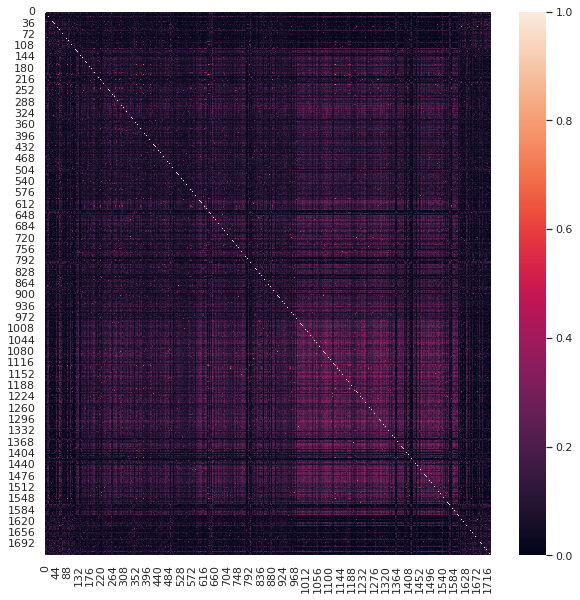

In [19]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(sims);

---

13. Постройте гистограмму распределения тем в документах.

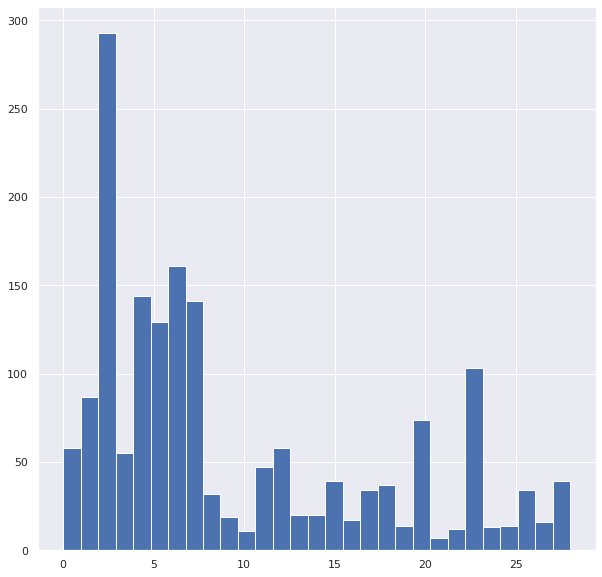

In [20]:
# build a histogram of the distribution of topics in documents

import matplotlib.pyplot as plt

topics = []
for i in range(len(corpus)):
    topics.append(ldamodel.get_document_topics(corpus[i])[0][0])

plt.hist(topics, bins=29)
plt.show()

---

14. Постройте пузырьковую диаграмму, отображающую темы в пространстве слов.<br><u>Рекомендация</u>: инструмент `pyLDAvis`.

In [21]:
# build a bubble chart displaying topics in word space. recommendation: pyLDAvis tool

import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(vis, "gdrive/My Drive/Colab Notebooks/save_viz.html")
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


---

1. **Какие темы наиболее выражены в документах? (топ-10 тем)**<br><br>Документация: https://radimrehurek.com/gensim/models/ldamodel.html<br><br>![image](https://i.ibb.co/HNC0Bc5/print-topics.png)

In [22]:
for idx, topic in popular_topics: 
    print('Topic: {:^4} Word: {:^4}'.format(idx, topic))

Topic:  0   Word: 0.015*"который" + 0.011*"время" + 0.010*"материал" + 0.007*"очень" + 0.006*"человек" + 0.006*"мочь" + 0.005*"самый" + 0.004*"частота" + 0.004*"точность" + 0.004*"атом" + 0.004*"говорить" + 0.004*"первый" + 0.004*"являться" + 0.004*"весь" + 0.004*"тело"
Topic:  5   Word: 0.019*"который" + 0.010*"мочь" + 0.008*"человек" + 0.008*"язык" + 0.007*"память" + 0.007*"говорить" + 0.006*"весь" + 0.005*"очень" + 0.005*"свой" + 0.005*"социальный" + 0.005*"объект" + 0.005*"внимание" + 0.005*"например" + 0.005*"время" + 0.004*"некоторый"
Topic:  3   Word: 0.017*"который" + 0.012*"очень" + 0.010*"мочь" + 0.010*"самый" + 0.009*"раса" + 0.008*"весь" + 0.005*"большой" + 0.005*"человек" + 0.005*"например" + 0.004*"время" + 0.004*"говорить" + 0.004*"образ" + 0.003*"некоторый" + 0.003*"дело" + 0.003*"называть"
Topic:  14  Word: 0.014*"который" + 0.009*"галактика" + 0.007*"мочь" + 0.007*"организм" + 0.006*"весь" + 0.006*"тело" + 0.006*"человек" + 0.005*"древний" + 0.004*"след" + 0.004*"живо

2. **Какие авторы значимы в этих темах? (список авторов)**

In [23]:
popular_topics = [topic[0] for topic in popular_topics]

top_authors = {}
for i in range(len(corpus)):
  if ldamodel.get_document_topics(corpus[i])[0][0] in popular_topics:
    if df['author'][i] not in top_authors:
      top_authors[df['author'][i]] = 0
    top_authors[df['author'][i]] += 1

top_authors = sorted(top_authors.items(), key=lambda x: x[1], reverse=True)
best_authors = []
for i in range(10):
  best_authors.append(top_authors[i][0])
  print(f'Этот автор: {top_authors[i][0]:^30} значим в теме: {popular_topics[i]:^4}')

Этот автор:        Виктор_Вахштайн         значим в теме:  0  
Этот автор:     Станислав_Дробышевский     значим в теме:  5  
Этот автор:        Алексей_Муравьёв        значим в теме:  3  
Этот автор:         Мария_Фаликман         значим в теме:  14 
Этот автор:        Владимир_Плунгян        значим в теме:  6  
Этот автор:         Гасан_Гусейнов         значим в теме:  22 
Этот автор:          Игорь_Исаев           значим в теме:  10 
Этот автор:        Дмитрий_Казаков         значим в теме:  8  
Этот автор:         Андрей_Кибрик          значим в теме:  9  
Этот автор:        Фёдор_Успенский         значим в теме:  24 


3. **Какие группы образуют авторы по темам? (группы авторов)**

In [24]:
group_authors = {}
for i in range(len(corpus)):
    if df['author'][i] in best_authors:
        for j in range(len(corpus)):
            if i != j and df['author'][i] != df['author'][j] and sims[i][j] > 0.55: # 55% of simmilarity
                if df['author'][i] not in group_authors:
                    group_authors[df['author'][i]] = set()
                group_authors.get(df['author'][i]).add(df['author'][j])

pprint(group_authors)

{'Алексей_Муравьёв': {'Александр_Пиперски',
                      'Анна_Рогожина',
                      'Владимир_Беликов',
                      'Владимир_Плунгян',
                      'Гасан_Гусейнов',
                      'Георгий_Старостин',
                      'Дмитрий_Худяков',
                      'Екатерина_Протасова',
                      'Кирилл_Бабаев',
                      'Яков_Тестелец'},
 'Андрей_Кибрик': {'Владимир_Плунгян',
                   'Кирилл_Бабаев',
                   'Нина_Сумбатова',
                   'Яков_Тестелец'},
 'Виктор_Вахштайн': {'Александр_Пиперски',
                     'Гасан_Гусейнов',
                     'Кирилл_Бабаев',
                     'Оксана_Запорожец',
                     'ПостНаука',
                     'Яков_Тестелец'},
 'Владимир_Плунгян': {'Александр_Пиперски',
                      'Алексей_Муравьёв',
                      'Анатолий_Баранов',
                      'Андрей_Кибрик',
                      'Анна_Рогожин

In [25]:
# based on authors, we can also build another similarity matrix for a set of topics of their articles

import numpy as np
import pandas as pd

df = pd.DataFrame(np.zeros((len(sorted_authors), len(sorted_authors))), columns=[i[0] for i in sorted_authors],
                    index=[i[0] for i in sorted_authors])
for i in range(len(sorted_authors)):
    for j in range(len(sorted_authors)):
        df.iloc[i, j] = len(sorted_authors[i][1].intersection(sorted_authors[j][1]))

df

,Михаил_Соколов,Александр_Марей,Гасан_Гусейнов,Евгений_Шеваль,Виталий_Куренной,Фёдор_Успенский,Илья_Женин,Дмитрий_Беляев,Александр_Павлов,Дмитрий_Дождев,...,Ирина_Левонтина,Елена_Голубева,Андрей_Коротаев,Татьяна_Гусарова,Дарья_Радченко,Александр_Беленький,Ирина_Каспэ,Марина_Корсакова-Крейн,Виталий_Дунин-Барковский,Дэвид_Гросс
Михаил_Соколов,12.0,6.0,7.0,1.0,5.0,4.0,2.0,4.0,4.0,4.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
Александр_Марей,6.0,10.0,4.0,1.0,2.0,2.0,4.0,3.0,3.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
Гасан_Гусейнов,7.0,4.0,8.0,0.0,4.0,3.0,3.0,4.0,4.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
Евгений_Шеваль,1.0,1.0,0.0,7.0,1.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Виталий_Куренной,5.0,2.0,4.0,1.0,7.0,2.0,1.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Александр_Беленький,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Ирина_Каспэ,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Марина_Корсакова-Крейн,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Виталий_Дунин-Барковский,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
